# 公众号：可视化图鉴

In [265]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib as mpl

WRYH = mpl.font_manager.FontProperties(fname = '/Users/liuhuanshuo/Desktop/可视化图鉴/font/WeiRuanYaHei-1.ttf') #微软雅黑字体

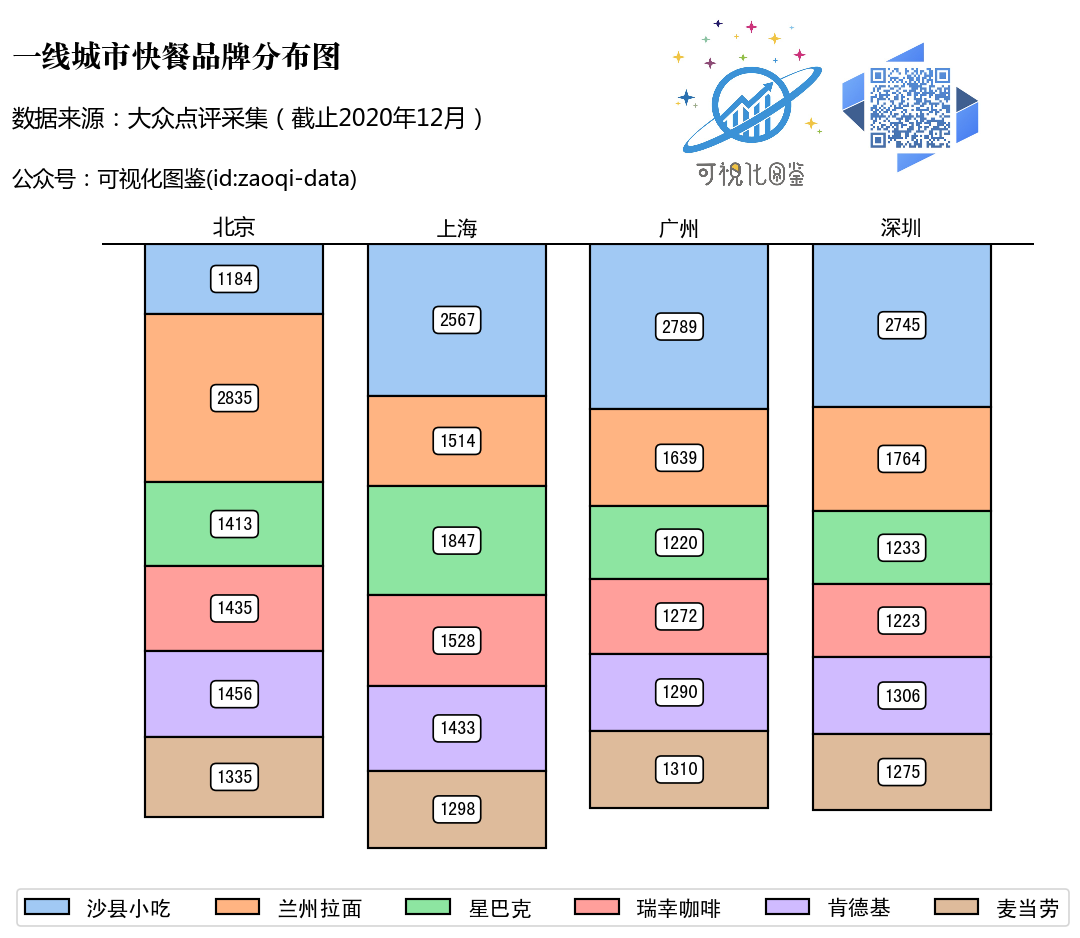

In [264]:
df = pd.read_excel("店铺数量.xlsx").loc[0:3]
plt.rcParams['font.sans-serif'] = ['SimHei'] 

x = ['北京','上海','广州','深圳']
y1 = list(df['沙县小吃'])
y2 = list(df['兰州拉面'])
y3 = list(df['星巴克'])
y4 = list(df['瑞幸咖啡'])
y5 = list(df['肯德基'])
y6 = list(df['麦当劳'])


sns.set_palette(palette="pastel",n_colors = 6)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(10,7),dpi = 120)#设置画布的尺寸
plt.bar(x, y1, label="沙县小吃",edgecolor = 'black',width = 0.8,linewidth = 1.3)
plt.bar(x, y2, label="兰州拉面",edgecolor = 'black',bottom = y1,width = 0.8,linewidth = 1.3)
plt.bar(x, y3, label="星巴克",edgecolor = 'black',bottom = [y1[i]+y2[i] for i in range(4)],width = 0.8,linewidth = 1.3)
plt.bar(x, y4, label="瑞幸咖啡",edgecolor = 'black',bottom = [y1[i]+y2[i]+y3[i] for i in range(4)],width = 0.8,linewidth = 1.3)
plt.bar(x, y5, label="肯德基",edgecolor = 'black',bottom = [y1[i]+y2[i]+y3[i]+y4[i] for i in range(4)],width = 0.8,linewidth = 1.3)
plt.bar(x, y6, label="麦当劳",edgecolor = 'black',bottom = [y1[i]+y2[i]+y3[i]+y4[i]+y5[i] for i in range(4)],width = 0.8,linewidth = 1.3)

plt.legend(loc=0,ncol = 6,fontsize = 13, bbox_to_anchor=(1.05, 0))  # 设置图例位置
plt.xticks(fontsize=13,fontproperties = WRYH)
plt.yticks([])

ax = plt.gca()
ax.spines['right'].set_color('None')
ax.spines['left'].set_color('None')
ax.spines['bottom'].set_color('None')
ax.spines['top'].set_linewidth(1.2)

ax.tick_params(which='major',length=0) #不显示刻度线

plt.gca().invert_yaxis() #反转坐标轴

plt.text(-1,-3000,"一线城市快餐品牌分布图",family = 'Songti SC',fontsize = 18)
plt.text(-1,-2000,"数据来源：大众点评采集（截止2020年12月）",fontproperties = WRYH,fontsize = 14)
plt.text(-1,-1000,"公众号：可视化图鉴(id:zaoqi-data)",fontproperties = WRYH,fontsize = 13)



for j in range(4):
    
    flag = 0
    
    for i in range(6):

        y_position = flag + df.loc[j][i+1]/2

        plt.text(j,y_position,int(df.loc[j][i+1]),bbox=dict(boxstyle='round', fc='w', ec='black',lw=1 ,alpha=1),fontsize = 11,
            verticalalignment = 'center',horizontalalignment = 'center')

        flag = flag + df.loc[j][i+1]
        

#以下为添加图片
arr_lena = mpimg.imread('/Users/liuhuanshuo/Downloads/带二维码logo.jpg')
imagebox = OffsetImage(arr_lena, zoom=0.15)
a1 = AnnotationBbox(imagebox, (3, 0), frameon = False,xycoords='data',
                    boxcoords=("axes fraction", "data"),
                    box_alignment=(7,-0.3))
ax.add_artist(a1)

plt.show()